In [1]:
from numpy.random import uniform, choice, beta
from pandas import Series, DataFrame
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider, interactive, Output, interact, IntSlider
from IPython.display import clear_output
from time import sleep
from sklearn.metrics import precision_recall_curve, roc_curve

%matplotlib notebook

In [11]:
def generate_labels(probs, rate=1, swap_rate=0):
    labels = []
    for prob in probs:
        label = choice([0, 1], p = [1- prob*rate, prob*rate])
        if choice([0, 1], p=[1-swap_rate, swap_rate]):
            label = 1 - label
        labels.append(label)

    return labels
    
    

In [12]:
def generate_data(n=100, rate=1, swap_rate=0):
    x = Series(uniform(0, 1, n))
    y = Series(generate_labels(x, rate=rate, swap_rate=swap_rate))
        
    return x, y

def get_binned_rates(x, y, n):
    rates = y.groupby(pd.cut(x, n)).agg('mean')
    return rates
    

In [15]:
x, y = generate_data(n=100, rate=1, swap_rate=0)

In [16]:
cutting_point = 0.1

In [20]:
y_pred = (x >= cutting_point).map({True:1, False:0})

In [ ]:
true_positive = y_pred & y

In [13]:
def visualize_binned_rate(rate=1, n=100, swap_rate=0, cutted_n=10):
    x, y = generate_data(n=n, rate=rate, swap_rate=swap_rate)
    rates = get_binned_rates(x, y, cutted_n)
    
    ax.clear()
    ax.bar(range(len(rates.values)), rates.values)
    fig.show()    
    
def visualize_recall_precision(rate=1, n=100, swap_rate=0, cutted_n=10):
    x, y = generate_data(n=n, rate=rate, swap_rate=swap_rate)
    
    precision, recall, thresholds = precision_recall_curve(y, x)
    thresholds = list(thresholds) + [1]
    
    
    ax.clear()
    ax.plot(thresholds, precision)
    ax.plot(thresholds, recall)
    ax.legend(['precision', 'recall'])

    fig.show()        

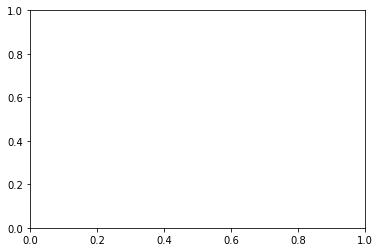

interactive(children=(FloatSlider(value=1.0, description='rate', max=1.0), IntSlider(value=100, description='n…

<function __main__.visualize_binned_rate(rate=1, n=100, swap_rate=0, cutted_n=10)>

In [14]:
ax = plt.subplot()
fig = ax.figure
interact(
    visualize_binned_rate, 
    swap_rate=FloatSlider(value=0, min=0, max=0.5, step=0.05),
    n=IntSlider(value=100, min=100, max=10000, step=100),
    rate = FloatSlider(value=1, min=0, max=1, step=0.1),
    cutted_n=IntSlider(value=2, min=2, max=20, step=1)
)

<IPython.core.display.Javascript object>


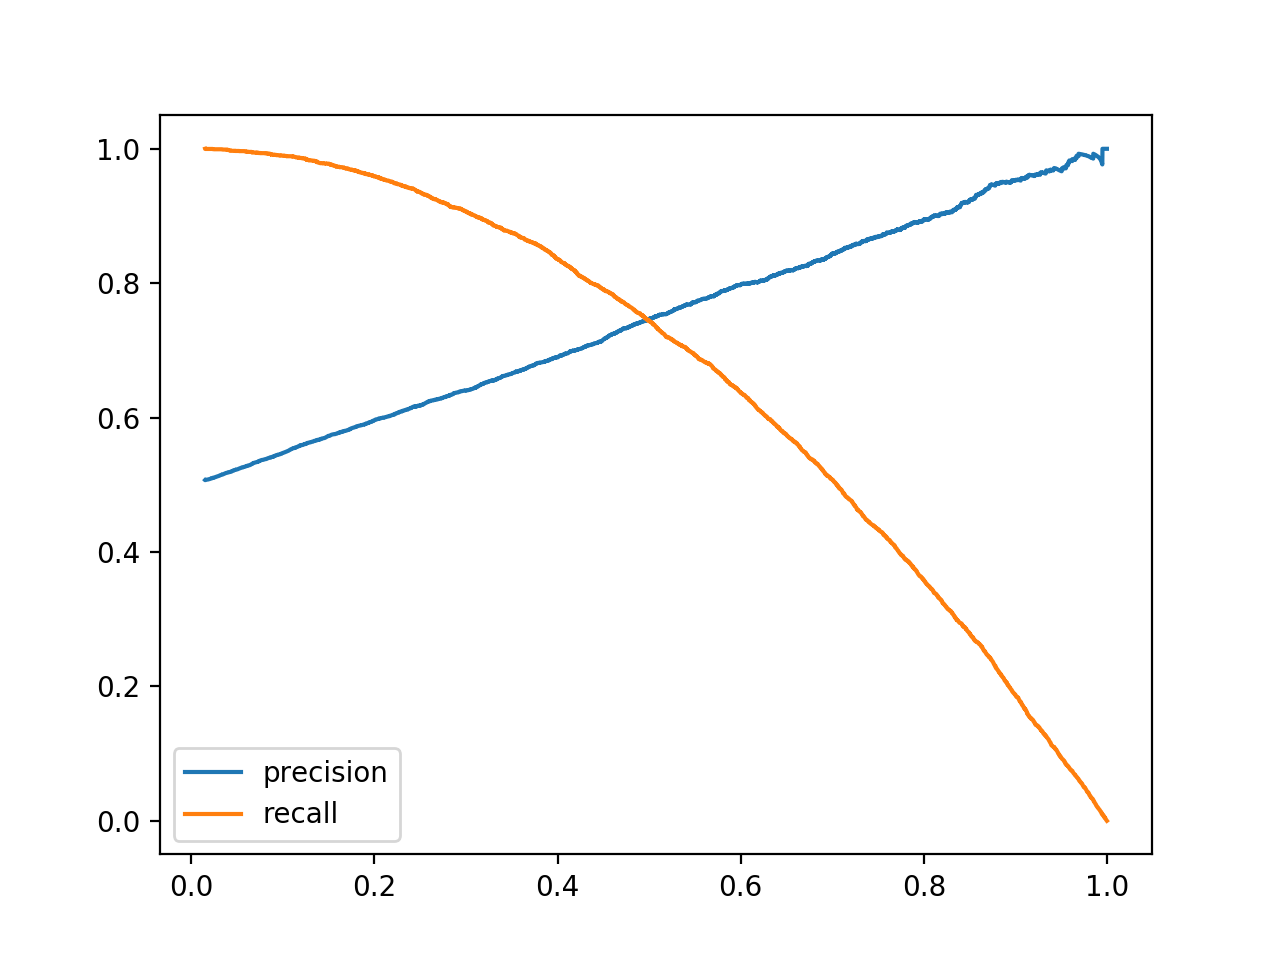

interactive(children=(FloatSlider(value=1.0, description='rate', max=1.0), IntSlider(value=100, description='n…

<function __main__.visualize_recall_precision(rate=1, n=100, swap_rate=0, cutted_n=10)>

In [7]:
ax = plt.subplot()
fig = ax.figure
interact(
    visualize_recall_precision, 
    swap_rate=FloatSlider(value=0, min=0, max=0.5, step=0.05),
    n=IntSlider(value=100, min=100, max=10000, step=100),
    rate = FloatSlider(value=1, min=0, max=1, step=0.1),
    cutted_n=IntSlider(value=2, min=2, max=20, step=1)
)

In [21]:
x = Series(uniform(0, 1, 1000))
y = Series(generate_labels(x, rate=1, swap_rate=0))


In [22]:
precision, recall, thresholds = precision_recall_curve(y, x)
thresholds = list(thresholds) + [1]

In [ ]:
def precision_recall_visualization(noise_level):
    display('noise level: {}'.format(noise_level))
    x = uniform(0, 1, 10000)
    y = generate_data(x, swap_rate=noise_level)
    precision, recall, thresholds = precision_recall_curve(y, x)
    thresholds = list(thresholds) + [1]
       
    ax.plot(thresholds, precision)
    ax.plot(thresholds, recall)
    ax.legend(['precision', 'recall'])
    display(ax.figure)    

In [ ]:
def precision_recall_visualization(noise_level):
    display('noise level: {}'.format(noise_level))
    x = uniform(0, 1, 10000)
    y = generate_data(x, swap_rate=noise_level)
    precision, recall, thresholds = precision_recall_curve(y, x)
    thresholds = list(thresholds) + [1]
       
    ax.clear()
    ax.plot(thresholds, precision)
    ax.plot(thresholds, recall)
    fig.show()

In [ ]:
display(ax.figure)